In [1]:
pip install vaex

Note: you may need to restart the kernel to use updated packages.


In [29]:
import vaex
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from datetime import datetime
import numpy as np


In [30]:
file_path = 'C:/COVID-19_Case_Surveillance_Public_Use_Data_with_Geography.csv'


In [31]:
vaex_df = vaex.from_csv(file_path, 
                        convert=True, 
                        chunk_size=22_00_000)

In [32]:
type(vaex_df)

vaex.dataframe.DataFrameLocal

In [33]:
vaex_df = vaex.open('C:/COVID-19_Case_Surveillance_Public_Use_Data_with_Geography.csv.hdf5')
vaex_df.head()

#,case_month,res_state,state_fips_code,res_county,county_fips_code,age_group,sex,race,ethnicity,case_positive_specimen_interval,case_onset_interval,process,exposure_yn,current_status,symptom_status,hosp_yn,icu_yn,death_yn,underlying_conditions_yn
0,2021-07,VT,50,WASHINGTON,48477,--,--,--,--,0,nan,Missing,Yes,Laboratory-confirmed case,Asymptomatic,No,Missing,No,--
1,2020-12,MN,27,BROWN,27015,0 - 17 years,--,--,--,0,0,Missing,Yes,Laboratory-confirmed case,Symptomatic,Missing,Missing,No,--
2,2021-03,MI,26,GLADWIN,26051,0 - 17 years,--,--,--,nan,0,Missing,Missing,Laboratory-confirmed case,Symptomatic,No,Missing,--,--
3,2021-08,OH,39,MERCER,39107,0 - 17 years,--,--,--,0,nan,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,--,--
4,2020-07,KY,21,PERRY,21193,0 - 17 years,--,--,--,nan,0,Missing,Missing,Laboratory-confirmed case,Symptomatic,No,Missing,No,--
5,2020-10,CA,6,CALAVERAS,6009,18 to 49 years,--,--,--,nan,0,Missing,Missing,Laboratory-confirmed case,Symptomatic,No,Missing,No,--
6,2020-06,CA,6,SISKIYOU,6093,18 to 49 years,--,--,--,nan,0,Missing,Missing,Laboratory-confirmed case,Symptomatic,Missing,Missing,No,--
7,2021-04,OR,41,CURRY,41015,50 to 64 years,--,--,--,nan,0,Missing,Missing,Laboratory-confirmed case,Symptomatic,No,Missing,No,--
8,2021-08,IL,17,WILLIAMSON,17199,50 to 64 years,Missing,Missing,Missing,nan,0,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,Missing,--
9,2021-01,FL,12,CITRUS,12017,0 - 17 years,Female,--,--,nan,0,Missing,Missing,Laboratory-confirmed case,Symptomatic,No,Missing,--,--


In [34]:
#Selecting Illinois State

Illinios_state_df = vaex_df[vaex_df["res_state"] == "IL"]
Illinios_state_df.head(20)

#,case_month,res_state,state_fips_code,res_county,county_fips_code,age_group,sex,race,ethnicity,case_positive_specimen_interval,case_onset_interval,process,exposure_yn,current_status,symptom_status,hosp_yn,icu_yn,death_yn,underlying_conditions_yn
0,2021-08,IL,17.0,WILLIAMSON,17199.0,50 to 64 years,Missing,Missing,Missing,nan,0.0,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,Missing,--
1,2020-07,IL,17.0,JERSEY,17083.0,18 to 49 years,Female,--,--,nan,0.0,Missing,Yes,Probable Case,Missing,No,Unknown,Unknown,--
2,2020-10,IL,17.0,MORGAN,17137.0,18 to 49 years,Female,Missing,Missing,nan,0.0,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,Missing,--
3,2020-12,IL,17.0,CHAMPAIGN,17019.0,18 to 49 years,Male,Missing,Missing,nan,0.0,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,Missing,--
4,2020-11,IL,17.0,FAYETTE,17051.0,18 to 49 years,Male,Missing,Hispanic/Latino,nan,0.0,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,--,--
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,2020-12,IL,17.0,MONTGOMERY,17135.0,0 - 17 years,Female,Missing,Missing,nan,0.0,Missing,Missing,Laboratory-confirmed case,Missing,No,Missing,Missing,--
16,2020-12,IL,17.0,MCDONOUGH,17109.0,18 to 49 years,Female,--,--,nan,0.0,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,Missing,--
17,2020-10,IL,17.0,WOODFORD,17203.0,18 to 49 years,Female,Missing,Missing,nan,0.0,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,Missing,--
18,2020-08,IL,17.0,WILL,17197.0,18 to 49 years,Female,Missing,Hispanic/Latino,nan,0.0,Missing,Missing,Probable Case,Missing,Missing,Missing,Missing,--


In [35]:
to_drop = ['case_positive_specimen_interval',
            'case_onset_interval',
            'process',
            'exposure_yn',
            'underlying_conditions_yn',
           'symptom_status',
          ]


Illinios_state_df.drop(to_drop, inplace=True)

#,case_month,res_state,state_fips_code,res_county,county_fips_code,age_group,sex,race,ethnicity,current_status,hosp_yn,icu_yn,death_yn
0,2021-08,IL,17.0,WILLIAMSON,17199.0,50 to 64 years,Missing,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing
1,2020-07,IL,17.0,JERSEY,17083.0,18 to 49 years,Female,--,--,Probable Case,No,Unknown,Unknown
2,2020-10,IL,17.0,MORGAN,17137.0,18 to 49 years,Female,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing
3,2020-12,IL,17.0,CHAMPAIGN,17019.0,18 to 49 years,Male,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing
4,2020-11,IL,17.0,FAYETTE,17051.0,18 to 49 years,Male,Missing,Hispanic/Latino,Laboratory-confirmed case,Missing,Missing,--
...,...,...,...,...,...,...,...,...,...,...,...,...,...
"1,503,853",2020-11,IL,17.0,COOK,17031.0,65+ years,Male,White,Unknown,Laboratory-confirmed case,Missing,Missing,Yes
"1,503,854",2020-11,IL,17.0,COOK,17031.0,65+ years,Male,White,Unknown,Laboratory-confirmed case,Missing,Missing,Missing
"1,503,855",2020-11,IL,17.0,COOK,17031.0,65+ years,Male,White,Unknown,Laboratory-confirmed case,Missing,Missing,Yes
"1,503,856",2020-11,IL,17.0,COOK,17031.0,65+ years,Male,White,Unknown,Laboratory-confirmed case,Missing,Missing,Yes


In [36]:
df_new = Illinios_state_df.dropna()
df_new

#,case_month,res_state,state_fips_code,res_county,county_fips_code,age_group,sex,race,ethnicity,current_status,hosp_yn,icu_yn,death_yn
0,2021-08,IL,17.0,WILLIAMSON,17199.0,50 to 64 years,Missing,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing
1,2020-10,IL,17.0,MORGAN,17137.0,18 to 49 years,Female,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing
2,2020-12,IL,17.0,CHAMPAIGN,17019.0,18 to 49 years,Male,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing
3,2021-08,IL,17.0,ROCK ISLAND,17161.0,0 - 17 years,Female,White,Hispanic/Latino,Probable Case,Missing,Missing,Missing
4,2020-11,IL,17.0,DEKALB,17037.0,18 to 49 years,Female,White,Hispanic/Latino,Laboratory-confirmed case,Missing,Missing,Missing
...,...,...,...,...,...,...,...,...,...,...,...,...,...
"1,165,348",2020-11,IL,17.0,COOK,17031.0,65+ years,Male,White,Unknown,Laboratory-confirmed case,Missing,Missing,Yes
"1,165,349",2020-11,IL,17.0,COOK,17031.0,65+ years,Male,White,Unknown,Laboratory-confirmed case,Missing,Missing,Missing
"1,165,350",2020-11,IL,17.0,COOK,17031.0,65+ years,Male,White,Unknown,Laboratory-confirmed case,Missing,Missing,Yes
"1,165,351",2020-11,IL,17.0,COOK,17031.0,65+ years,Male,White,Unknown,Laboratory-confirmed case,Missing,Missing,Yes


In [10]:
df_new.export_csv("C:/covid1.csv")

In [37]:
data = pd.read_csv("C:/covid1.csv")
type(data)

pandas.core.frame.DataFrame

In [38]:
data['sex']=np.where(data['sex'] =='Missing', 'Unknown', data['sex'])
data['race']=np.where(data['race'] =='Missing', 'Unknown', data['race'])
data['ethnicity']=np.where(data['ethnicity'] =='Missing', 'Unknown', data['ethnicity'])

In [39]:
data['age_group'].value_counts()

18 to 49 years    648658
50 to 64 years    232545
65+ years         142436
0 - 17 years      141577
Missing              137
Name: age_group, dtype: int64

In [40]:
data['age_group'].unique()

array(['50 to 64 years', '18 to 49 years', '0 - 17 years', '65+ years',
       'Missing'], dtype=object)

In [41]:
data['sex'].value_counts()
data['sex'].unique()

array(['Unknown', 'Female', 'Male'], dtype=object)

In [42]:
data['race'].value_counts()
data['race'].unique()

array(['Unknown', 'White', 'American Indian/Alaska Native', 'Black',
       'Asian', 'Multiple/Other',
       'Native Hawaiian/Other Pacific Islander'], dtype=object)

In [43]:
data['ethnicity'].value_counts()

Non-Hispanic/Latino    592536
Unknown                442506
Hispanic/Latino        130311
Name: ethnicity, dtype: int64

Changing the value names; 

### DATA EXPLORATION

In [18]:
data['current_status'].value_counts()
data['current_status'].unique()

array(['Laboratory-confirmed case', 'Probable Case'], dtype=object)

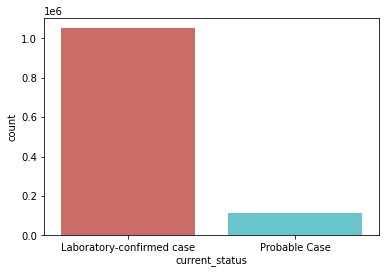

<Figure size 432x288 with 0 Axes>

In [19]:
sns.countplot(x = 'current_status', data = data, palette ='hls')
plt.show()
plt.savefig("count plot")

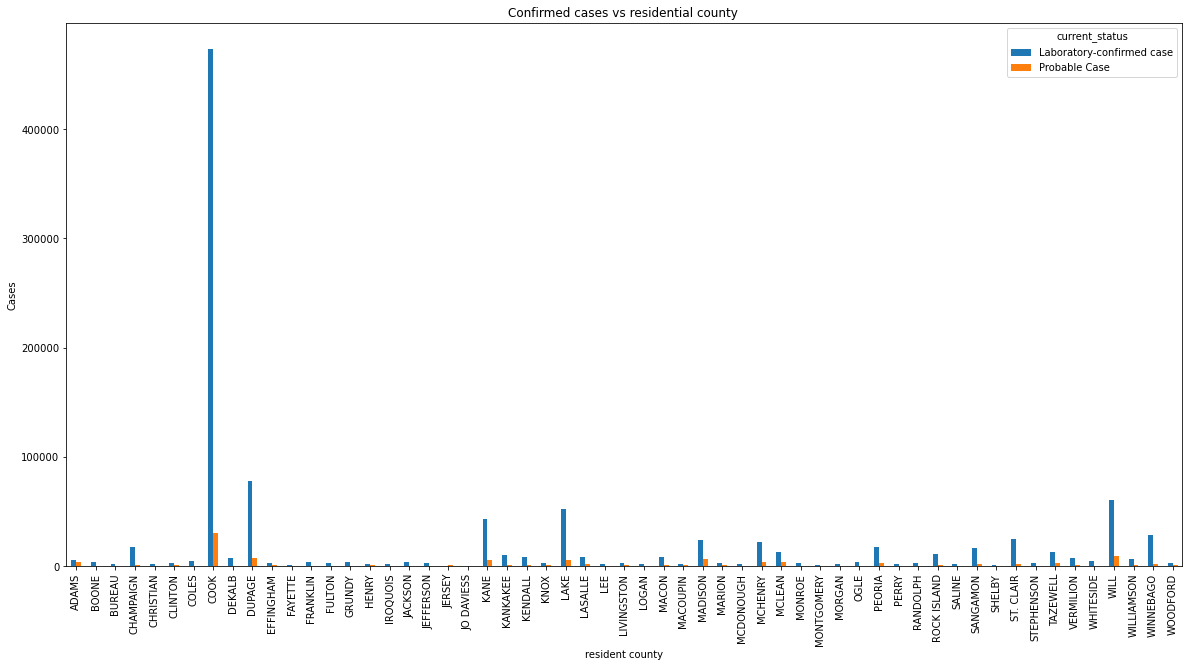

In [20]:
%matplotlib inline

pd.crosstab(data.res_county,data.current_status).plot(kind='bar')
plt.gcf().set_size_inches(20, 10)
plt.title('Confirmed cases vs residential county ')
plt.xlabel('resident county')
plt.ylabel('Cases')
plt.savefig('cases_fre_residence')

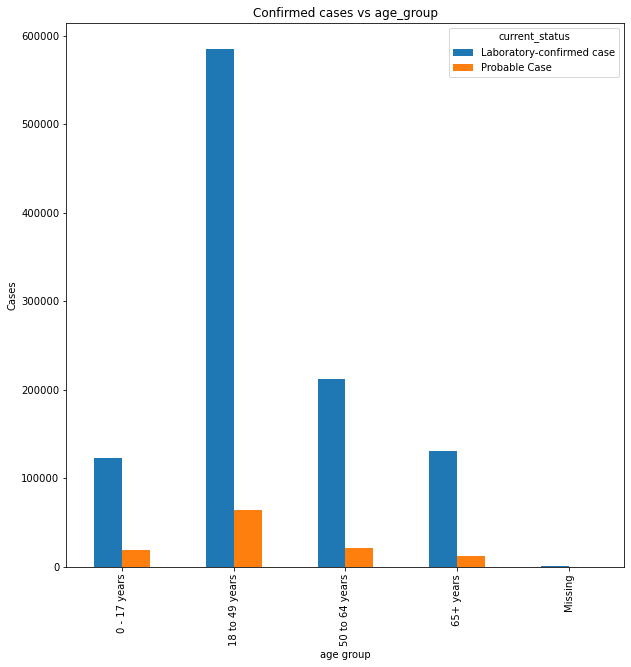

In [21]:
%matplotlib inline

pd.crosstab(data.age_group,data.current_status).plot(kind='bar')
plt.gcf().set_size_inches(10, 10)
plt.title('Confirmed cases vs age_group')
plt.xlabel('age group')
plt.ylabel('Cases')
plt.savefig('cases_fre_age_group')

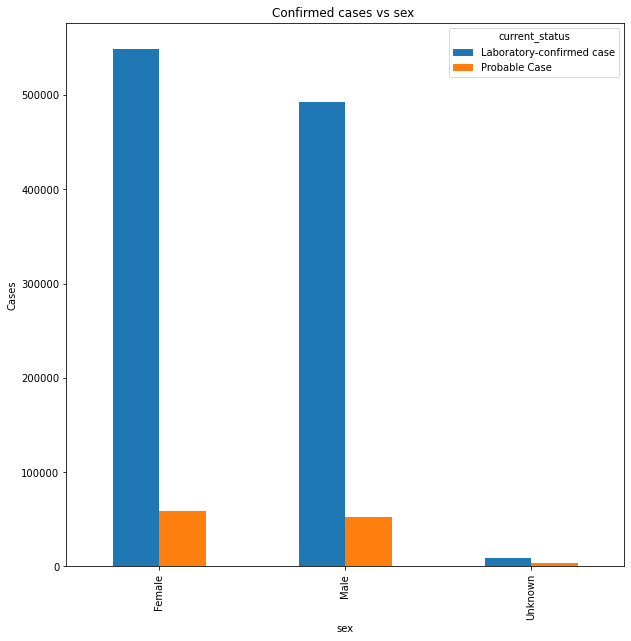

In [22]:
%matplotlib inline

pd.crosstab(data.sex,data.current_status).plot(kind='bar')
plt.gcf().set_size_inches(10, 10)
plt.title('Confirmed cases vs sex ')
plt.xlabel('sex')
plt.ylabel('Cases')
plt.savefig('cases_fre_sex')

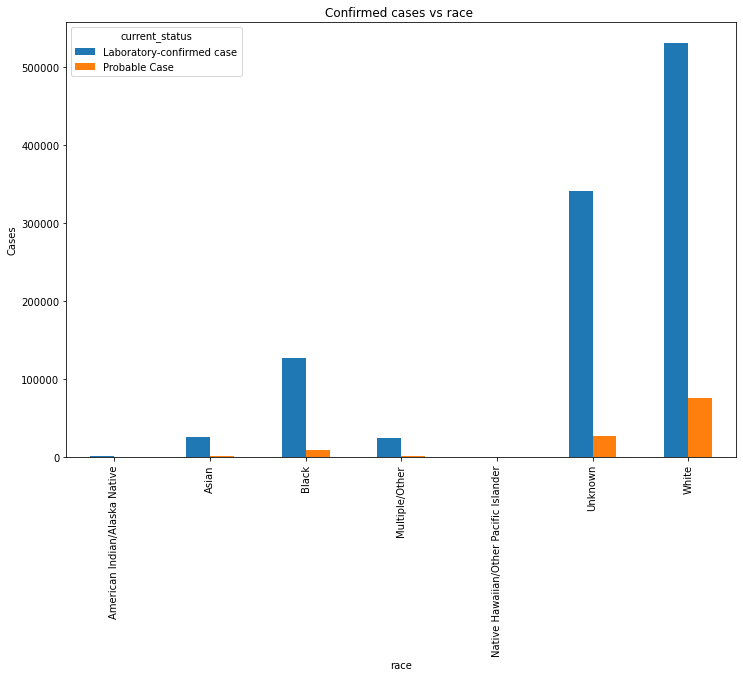

In [23]:
%matplotlib inline

pd.crosstab(data.race,data.current_status).plot(kind='bar')
plt.gcf().set_size_inches(12, 8)
plt.title('Confirmed cases vs race ')
plt.xlabel('race')
plt.ylabel('Cases')
plt.savefig('cases_fre_race')

### Changing categorical into numeric  

In [44]:
data['age_group'].replace(['50 to 64 years', '18 to 49 years', '0 - 17 years', '65+ years',
       'Missing'],
                        [0, 1, 2, 3, 4], inplace=True)
data['sex'].replace(['Unknown', 'Female', 'Male'],
                        [0, 1, 2], inplace=True)

data['race'].replace(['Unknown', 'White', 'American Indian/Alaska Native', 'Black',
       'Asian', 'Multiple/Other',
       'Native Hawaiian/Other Pacific Islander'],
                        [0, 1, 2, 3, 4, 5, 6], inplace=True)
data['current_status'].replace(['Laboratory-confirmed case', 'Probable Case'], [1,0], inplace = True)

In [46]:
data_split = data.sample(frac= 0.1,random_state=200) #splitting the data to increase the time
data_split.reset_index(inplace = True)

In [47]:
for i in range(len(data_split['case_month'])):
    data_split.case_month[i] =  data_split.case_month[i].replace("-","")


<ipython-input-47-83908f6b0c73>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_split.case_month[i] =  data_split.case_month[i].replace("-","")


In [61]:
data_split.case_month = pd.to_numeric(data_split.case_month)
data_split

,index,case_month,res_state,state_fips_code,res_county,county_fips_code,age_group,sex,race,ethnicity,current_status,hosp_yn,icu_yn,death_yn
0,425136,202103,IL,17.0,CHAMPAIGN,17019.0,2,2,3,Non-Hispanic/Latino,1,Missing,Missing,Missing
1,784000,202006,IL,17.0,COOK,17031.0,1,1,3,Non-Hispanic/Latino,1,No,Unknown,Unknown
2,398952,202012,IL,17.0,LAKE,17097.0,1,1,1,Non-Hispanic/Latino,1,No,Missing,Missing
3,170366,202101,IL,17.0,LIVINGSTON,17105.0,1,1,1,Non-Hispanic/Latino,0,Missing,Missing,Missing
4,1108892,202012,IL,17.0,COOK,17031.0,0,2,3,Non-Hispanic/Latino,0,Missing,Missing,Missing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116530,643921,202004,IL,17.0,KANE,17089.0,3,1,1,Non-Hispanic/Latino,1,No,No,Yes
116531,348662,202104,IL,17.0,MCLEAN,17113.0,2,1,5,Non-Hispanic/Latino,1,No,Missing,Missing
116532,187257,202107,IL,17.0,ADAMS,17001.0,1,1,0,Unknown,0,Missing,Missing,Missing
116533,1076336,202012,IL,17.0,COOK,17031.0,1,1,0,Unknown,1,Missing,Missing,Missing


In [60]:
data_split.to_csv("C:/processed_covid.csv")

In [63]:
to_drop = ['res_county',
            'res_state',
            'ethnicity',
            'hosp_yn',
            'icu_yn',
           'death_yn',
           'index'
          ]


data_split.drop(to_drop, axis = 1, inplace=True)

In [65]:
X = data_split.loc[:, data_split.columns != 'current_status']
y = data_split.loc[:, data_split.columns == 'current_status']

In [66]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear', random_state=0)

In [67]:
model.fit(X, y)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression(random_state=0, solver='liblinear')

In [68]:
model.intercept_

array([9.11895969e-09])

In [69]:
model.coef_

array([[ 7.31239337e-05,  2.16031501e-08, -7.35966169e-04,
        -1.86405442e-06,  3.18403906e-06,  5.29294725e-06]])

In [70]:
model.predict_proba(X)

array([[0.09507577, 0.90492423],
       [0.09645485, 0.90354515],
       [0.1007331 , 0.8992669 ],
       ...,
       [0.09391868, 0.90608132],
       [0.096418  , 0.903582  ],
       [0.09451178, 0.90548822]])

In [71]:
model.predict(X)

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [72]:
model.score(X,y)

#90% accuracy 

0.9006221306903506

In [73]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y, model.predict(X))

array([[     0,  11581],
       [     0, 104954]], dtype=int64)

Inferences;

1.No true negative predictions: There are none probable case) and predicted correctl

2.No false negative predictions: These are the ones wrongly predicted as probable cases.

3.11581 false positive prediction: There are 11581 observation as a zero that was wrongly predicted as confirmed cases.

4.104954 true positive predictions: The last 104954 observations are ones predicted correctly.

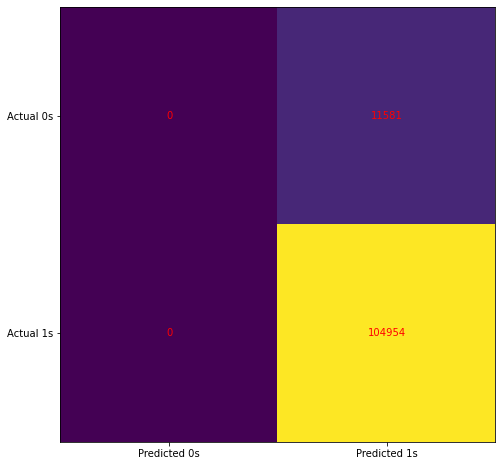

<Figure size 432x288 with 0 Axes>

In [74]:
cm = confusion_matrix(y, model.predict(X))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()
plt.savefig("Confusion_Matrix")

### Correlation Plot  

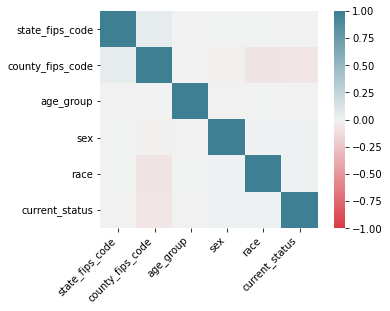

In [75]:
corr = data.corr() 
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(10, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
plt.savefig("Correlation_graph")

Inference; 
There is a negative correlation noticed between county_fips_code and current_status.
Also between race and county_fips_code

# Multiple

In [27]:
from sklearn.model_selection import train_test_split

                  case_month  state_fips_code  county_fips_code  age_group  \
case_month              1.00              0.0              0.08       0.03   
state_fips_code         0.00              1.0              0.00       0.00   
county_fips_code        0.08              0.0              1.00      -0.01   
age_group               0.03              0.0             -0.01       1.00   
sex                     0.00              0.0             -0.01      -0.00   
race                    0.04             -0.0             -0.04       0.02   
current_status         -0.21             -0.0             -0.08      -0.02   

                   sex  race  current_status  
case_month        0.00  0.04           -0.21  
state_fips_code   0.00 -0.00           -0.00  
county_fips_code -0.01 -0.04           -0.08  
age_group        -0.00  0.02           -0.02  
sex               1.00  0.01            0.02  
race              0.01  1.00           -0.02  
current_status    0.02 -0.02            1.00  

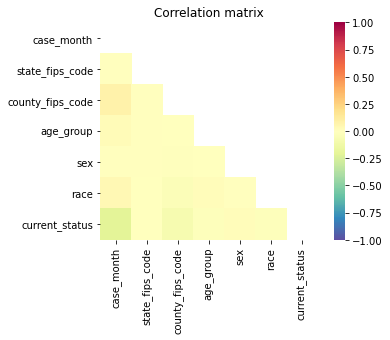

In [79]:
import statsmodels.api as sm

print(data_split.corr(method = "spearman").round(2))
correlation = data_split.corr(method = "spearman")
mask_data = np.zeros_like(correlation)
mask_data[np.triu_indices_from(mask_data)] = True
sns.heatmap(correlation, cmap='Spectral_r', mask=mask_data, square=True, vmin=-1, vmax=1)
plt.title('Correlation matrix')

#Create the dataframes for X and Y
X = data_split.loc[:, data_split.columns != 'current_status']
y = data_split.loc[:, data_split.columns == 'current_status']

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.20, random_state = 5)

linear_model = sm.OLS(Y_train, sm.add_constant(X_train)).fit()
Y_pred = linear_model.predict(sm.add_constant(X_test))
print_model = linear_model.summary()
print(print_model)


In [77]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [81]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

#VIF factor
x_temp_old = sm.add_constant(X_train)
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x_temp_old.values, i) for i in range(x_temp_old.values.shape[1])]
vif["features"] = x_temp_old.columns
print(vif.round(1))

   VIF Factor          features
0  21633821.7             const
1         1.0        case_month
2         1.0   state_fips_code
3         1.0  county_fips_code
4         1.0         age_group
5         1.0               sex
6         1.0              race


no variable has VIF more than 1 and so it is alright if we do not get rid of any variable, which we are currently using

This Multiple linear Regression has an R^2 Value of 0.035 i.e the goodness-of-fit measure for linear regression models. The percentage of the variance in the dependent variable that the independent variables explain collectively.

This value is relativeky low in comparision to Logistic Regression; 

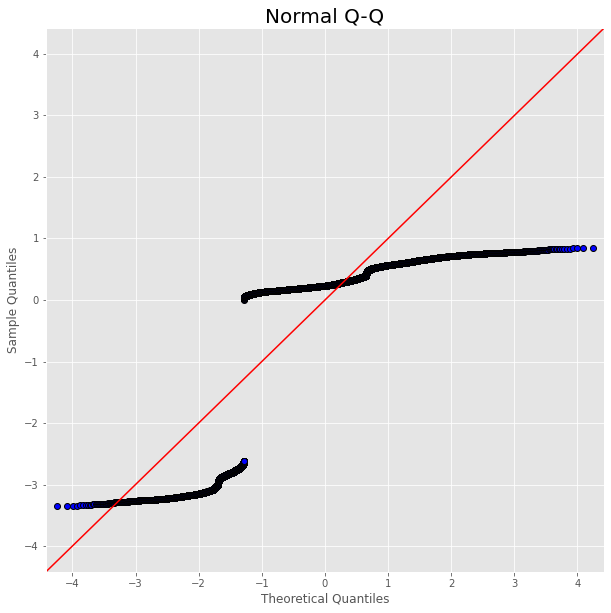

<Figure size 720x720 with 0 Axes>

In [86]:
plt.rc('figure', figsize=(10,10))
plt.style.use('ggplot')

probplot = sm.ProbPlot(linear_model.get_influence().resid_studentized_internal, fit=True)
fig = probplot.qqplot(line='45', marker='o', color='black')
plt.title('Normal Q-Q', fontsize=20)
plt.show()
plt.savefig("Q-Q Plot")